In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, roc_curve, roc_auc_score, confusion_matrix, precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
import xgboost as xgb
import streamlit as st
#svm
#neural network
#decision tree
#random forest
#logistic regression
#KNN
#Naive Bayes


In [2]:
#standard scaling
#on income triglycerides  cholesterol age
#print(data.describe())
#columns_to_scale=['Income','Triglycerides','Cholesterol','Age']
#data[columns_to_scale]=StandardScaler().fit_transform(data[columns_to_scale])


Numeric Columns
['Age' 'Cholesterol' 'Heart Rate' 'Diabetes' 'Family History' 'Smoking'
 'Obesity' 'Alcohol Consumption' 'Exercise Hours Per Week'
 'Previous Heart Problems' 'Medication Use' 'Stress Level'
 'Sedentary Hours Per Day' 'BMI' 'Triglycerides' 'Sleep Hours Per Day'
 'Heart Attack Risk']

Non-Numeric Columns
['Sex' 'Diet' 'Systolic' 'Diastolic']
No Missing Values
There are no duplicate entries


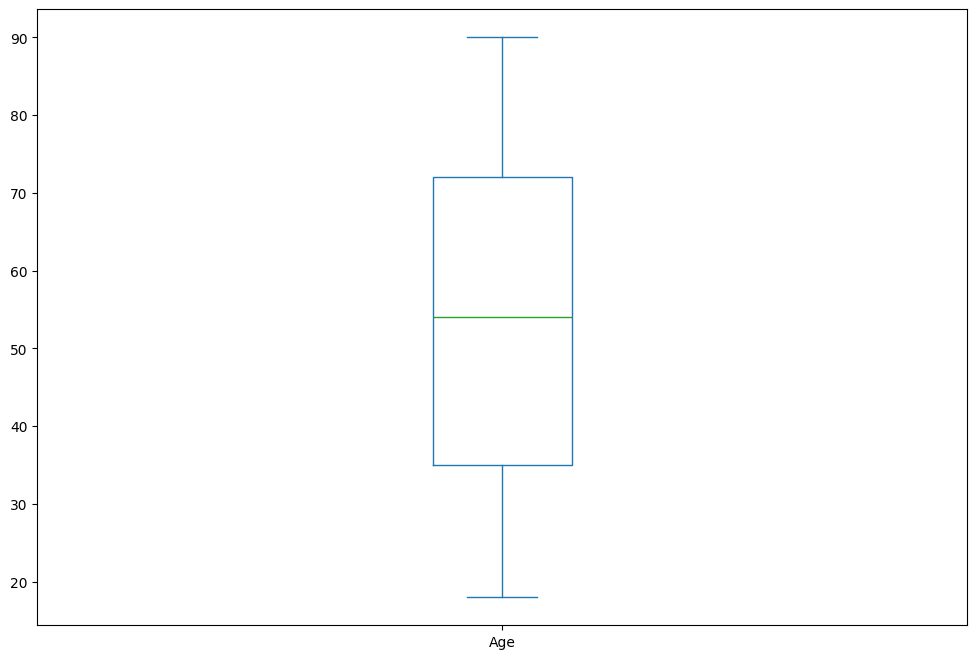

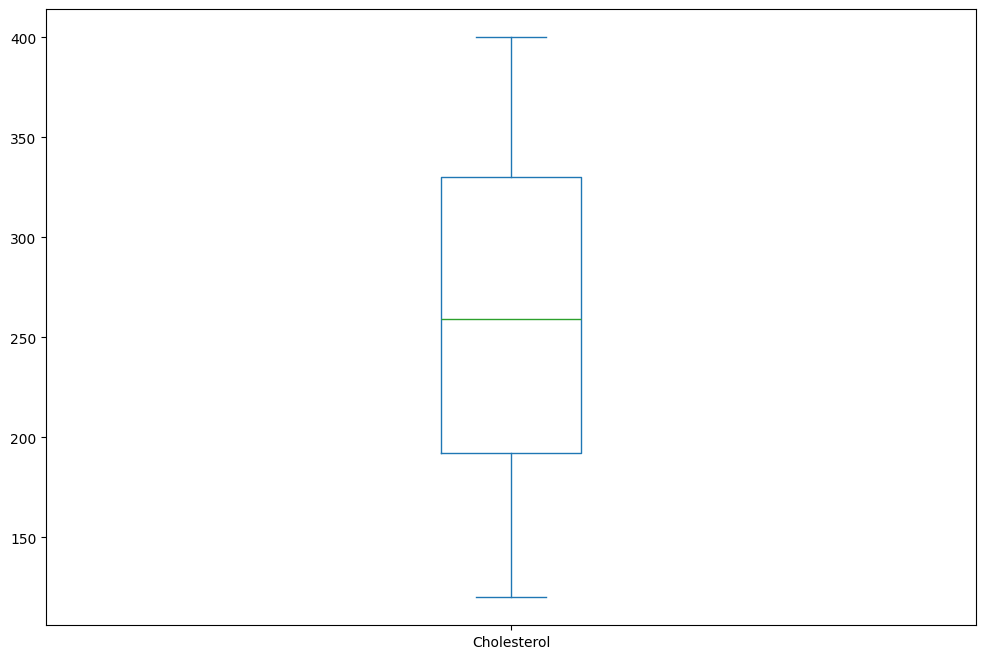

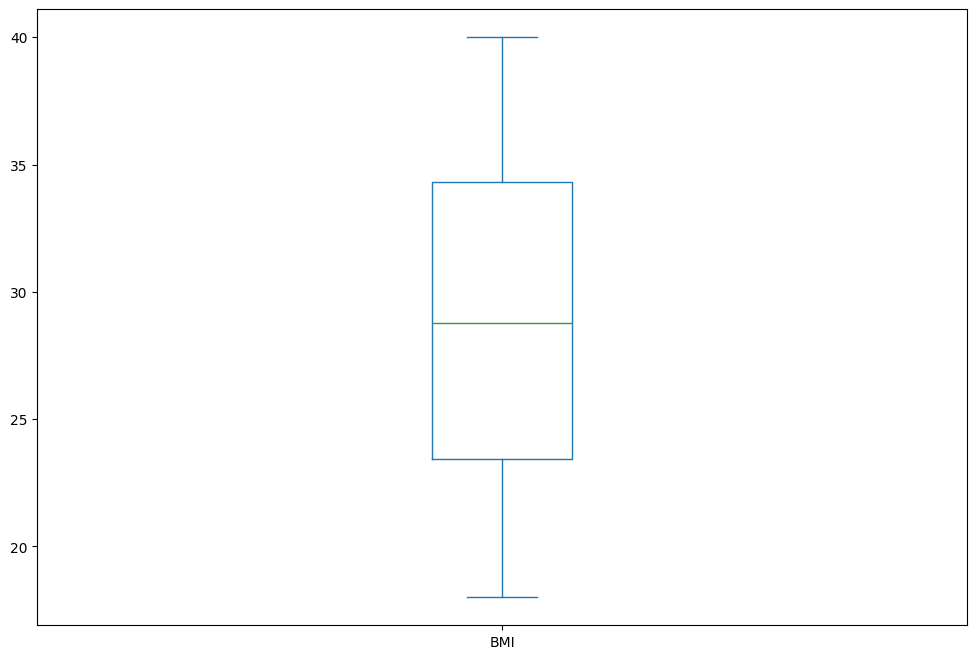

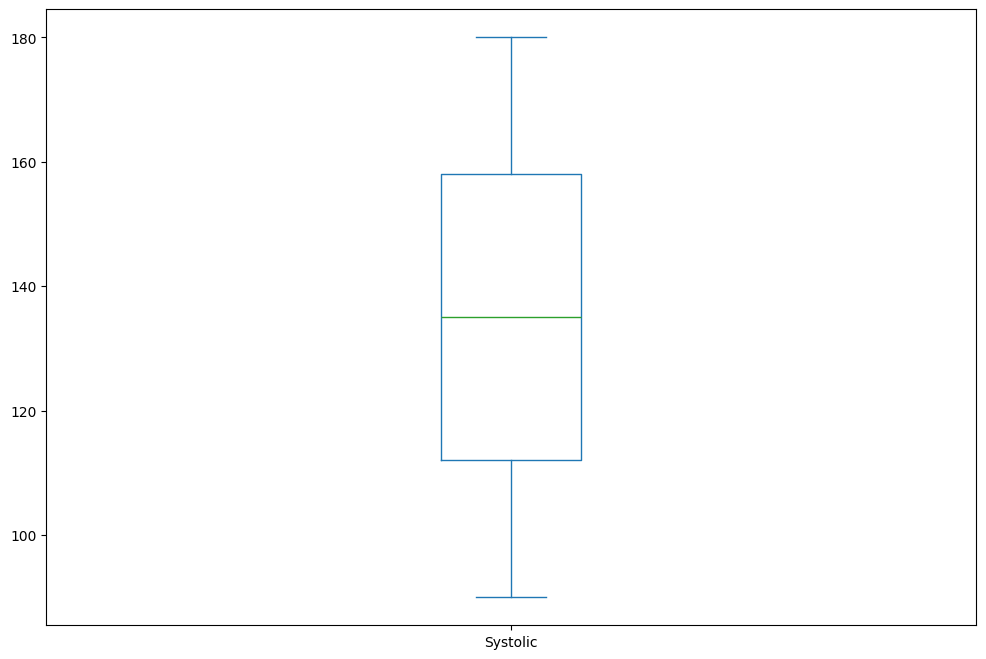

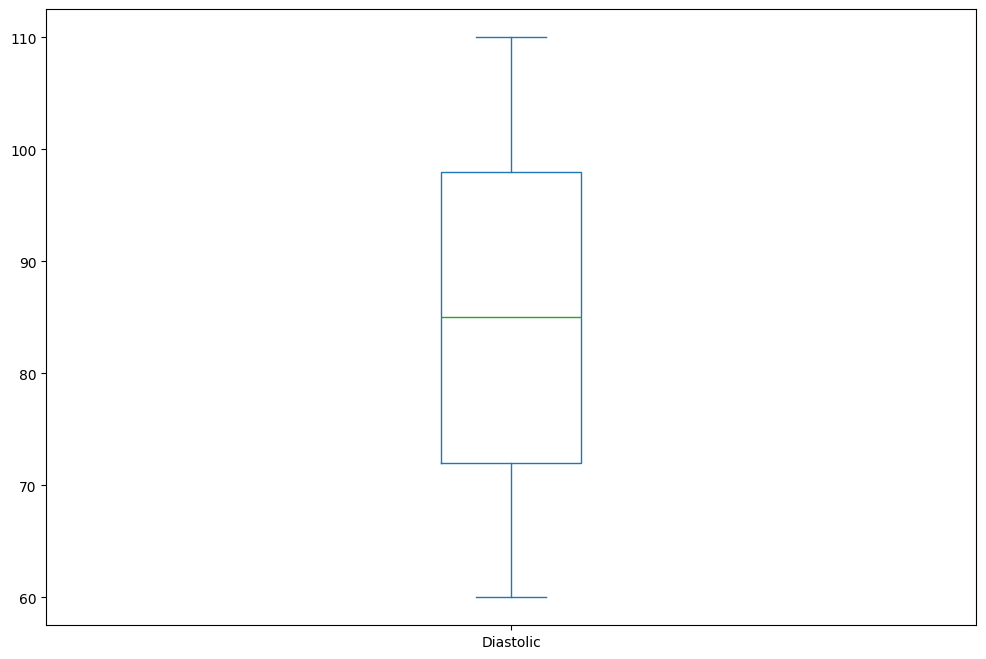

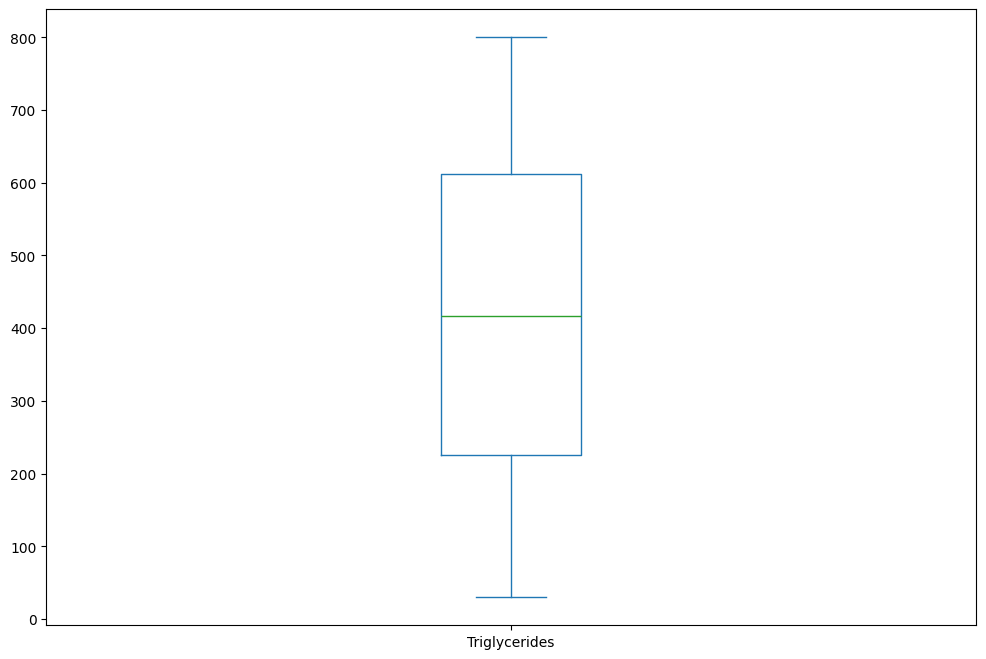

In [3]:
from DataCleaning import DataCleaning
#read csv
dc=DataCleaning()
path='heart_attack_prediction_dataset.csv'
data=dc.read_csv()

#data.head()
#clean data
#drop unecessary columns
unecessary_columns=['Patient ID','Country','Continent',
                    'Hemisphere','Income','Physical Activity Days Per Week']
data=dc.drop_columns(unecessary_columns)
 #splitting Blood pressure into systolicand diastolic
data=dc.split()
#numeric cols and not numeric cols
dc.cols_analysis()

#searching and handling missing values
dc.missing_values()
#searching and handling duplicates
#
dc.searching_duplicates()
#convert into numeric values Systolic and Diastolic
dc.to_numeric('Systolic')
dc.to_numeric('Diastolic')
data.dtypes
#Label object type columns
#LabelEncoder
dc.label_encoding()
data.dtypes

#searching for outlier values
dc.detect_outliers()



In [4]:
from TrainTestSplit import Split
sp=Split(data)
X,y=sp.split_to_x_y()
X_scaled,y_rescaled=sp.rescale(X,y)
X_train,X_test,y_train,y_test=sp.split(X_scaled,y_rescaled)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7873, 20)
(7873,)
(3375, 20)
(3375,)


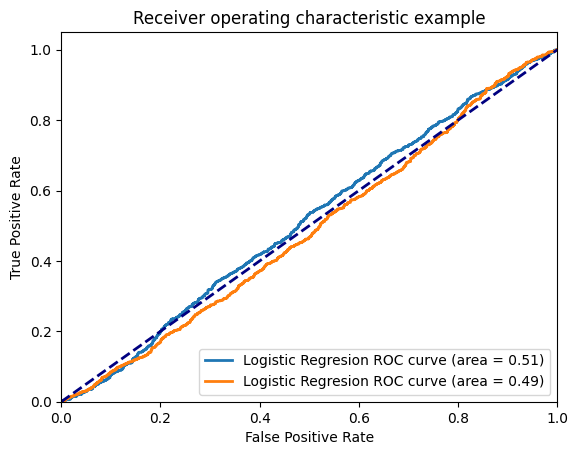

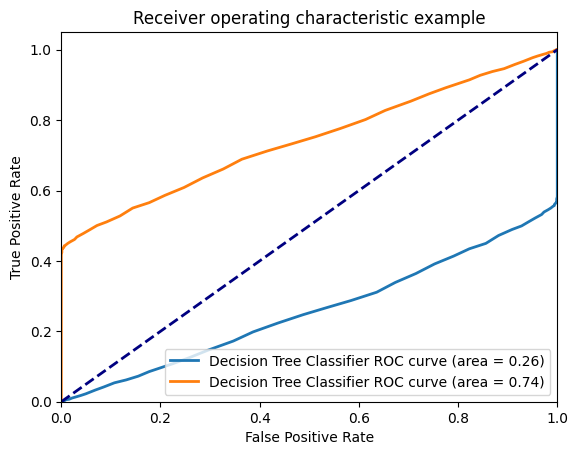

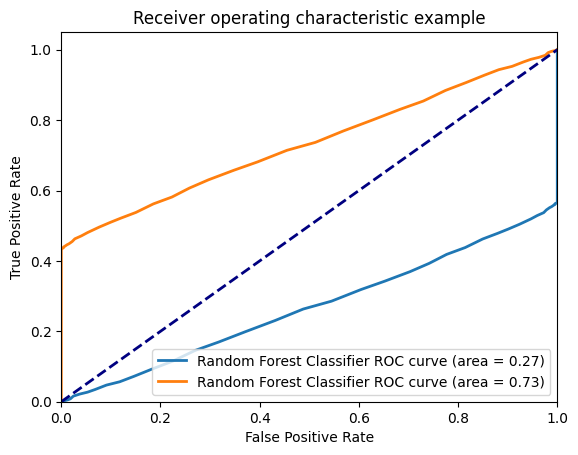

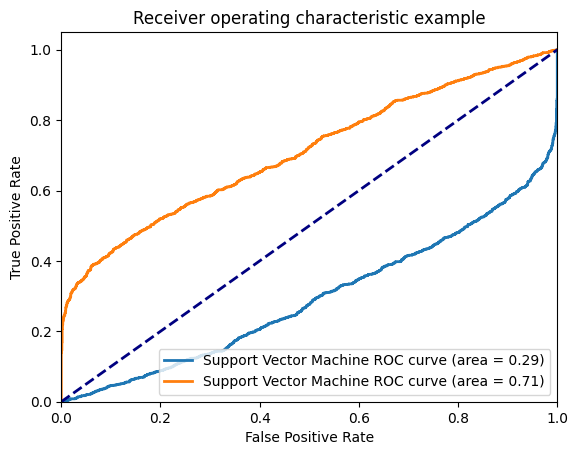

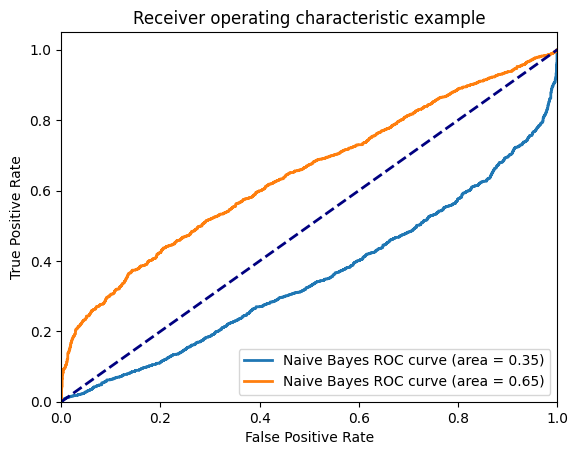

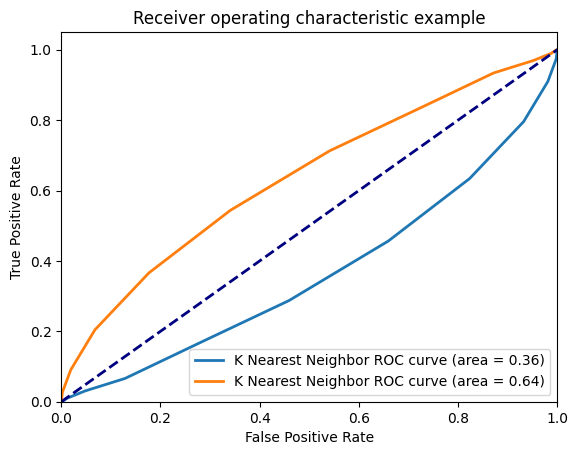

                      Model  Accuracy   ROC_AUC score
0        Logistic Regresion  0.487704        0.487679
1  Decision Tree Classifier  0.713481        0.714305
2  Random Forest Classifier  0.712889        0.713787
3    Support Vector Machine  0.646815        0.647074
4               Naive Bayes  0.600889        0.600916
5        K Nearest Neighbor  0.586370        0.585883


In [5]:
from TrainTestSplit import ModelAnalysis
ml=ModelAnalysis(X_train,y_train,X_test,y_test)
result=ml.summarize_models()
print(result)


In [7]:
from Pipe import CreatePipeLine
from sklearn import set_config

cp=CreatePipeLine(data)
#random=cp.create_random_forest_pipe()
#random.fit(X_train,y_train).score(X_test,y_test)

#combined= cp.combine()
#combined2=cp.combine2()
#print(combined)
#set_config(display='diagram')
#combined
#set_config(display='diagram')
#combined2

#combined2.fit_transform(X_train,y_train)
#print('random forest')
#cp.fit_combined(RandomForestClassifier(n_estimators=100))
#print('logistic regression')
#cp.fit_combined(LogisticRegression())
#print('xgb')
#cp.fit_combined(xgb.XGBClassifier())
print('naive bayes')
cp.fit_combined(BaggingClassifier(GaussianNB(),n_estimators=100))


#combined.fit_transform(X_train,y_train)





naive bayes
Accuracy of the model is  0.7143703703703703
